In [ ]:
import tensorflow as tf
print(tf.version)

<module 'tensorflow._api.v2.version' from '/usr/local/lib/python3.10/dist-packages/tensorflow/_api/v2/version/__init__.py'>


In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
model=Sequential()

In [ ]:
model.add(Dense(10, input_shape=(8,)))
model.add(Dense(10))
model.add(Dense(30))
model.add(Dense(20))
model.add(Dense(3))
model.add(Dense(1))

In [ ]:
from tensorflow.keras import Model
from tensorflow.keras import Input
from tensorflow.keras.layers import Dense

In [ ]:
x_in = Input(shape=(8,))
x1=Dense(10)(x_in)
x2=Dense(10)(x1)
x3=Dense(10)(x2)
x_out=Dense(1)(x3)
model=Model(inputs=x_in,outputs=x_out)

In [ ]:
#Keras Sequential API EXAMPLE :MNIST Dataset


In [ ]:
import numpy as np
import pandas as pd

import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Activation,Dropout
from tensorflow.keras.optimizers import Adam , RMSprop
from tensorflow.keras.utils import to_categorical,plot_model

In [ ]:
from tensorflow.keras.datasets import mnist
(x_train,y_train),(x_test,y_test)=mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
unique,counts=np.unique(y_test, return_counts=True)
print("test has",dict(zip(unique,counts)))

test has {0: 980, 1: 1135, 2: 1032, 3: 1010, 4: 982, 5: 892, 6: 958, 7: 1028, 8: 974, 9: 1009}


In [ ]:
unique,counts=np.unique(y_train, return_counts=True)
print("train has",dict(zip(unique,counts)))

train has {0: 5923, 1: 6742, 2: 5958, 3: 6131, 4: 5842, 5: 5421, 6: 5918, 7: 6265, 8: 5851, 9: 5949}


In [ ]:
indexes = np.random.randint(0,x_train.shape[0], size=25)
images=x_train[indexes]
labels=y_train[indexes]


In [ ]:
labels

array([9, 9, 4, 6, 4, 5, 1, 3, 7, 3, 1, 2, 0, 8, 5, 2, 3, 6, 8, 8, 7, 5,
       5, 1, 7], dtype=uint8)

In [ ]:
num_labels=len(np.unique(labels))
num_labels

10

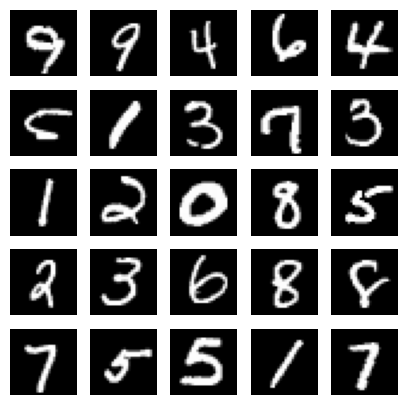

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(5,5))
for i in range(len(indexes)):
  plt.subplot(5,5,i+1)
  image=images[i]

  plt.imshow(image,cmap='gray')
  plt.axis('off')

In [ ]:
plt.show()
plt.savefig("mnist-samples.png")
plt.close('all')

In [ ]:
y_train=to_categorical(y_train)
y_test=to_categorical(y_test)

In [ ]:
x_train.shape

(60000, 28, 28)

In [ ]:
x_train.shape[1]

28

In [ ]:
x_train[1:].max()

255

In [ ]:
image_size=x_train.shape[1]
input_size=image_size*image_size
x_train=np.reshape(x_train,[-1,input_size])
x_train=x_train.astype('float32')/255
x_test=np.reshape(x_test,[-1,input_size])
x_test=x_test.astype('float32')/255

In [ ]:
batch_size=128
hidden_units=256
dropout=0.45

In [ ]:
model=Sequential()

In [ ]:
model.add(Dense(hidden_units, input_dim=input_size))
model.add(Activation('relu'))
model.add(Dropout(dropout))
model.add(Dense(hidden_units))
model.add(Activation('relu'))
model.add(Dropout(dropout))
model.add(Dense(num_labels))
model.add(Activation('softmax'))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 256)               200960    
                                                                 
 activation (Activation)     (None, 256)               0         
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_11 (Dense)            (None, 256)               65792     
                                                                 
 activation_1 (Activation)   (None, 256)               0         
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_12 (Dense)            (None, 10)               

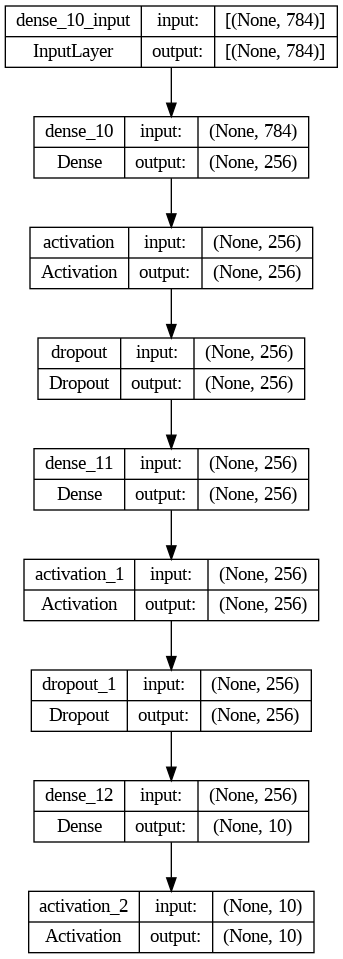

In [ ]:
plot_model(model,to_file='mlp.mnist.png',show_shapes=True)

In [ ]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
model.fit(x_train,y_train,epochs=20,batch_size=batch_size)

Epoch 1/20
469/469 [==============================] - 6s 9ms/step - loss: 0.4239 - accuracy: 0.8684
Epoch 2/20
469/469 [==============================] - 5s 10ms/step - loss: 0.1945 - accuracy: 0.9420
Epoch 3/20
469/469 [==============================] - 6s 12ms/step - loss: 0.1543 - accuracy: 0.9531
Epoch 4/20
469/469 [==============================] - 4s 9ms/step - loss: 0.1312 - accuracy: 0.9602
Epoch 5/20
469/469 [==============================] - 6s 13ms/step - loss: 0.1149 - accuracy: 0.9645
Epoch 6/20
469/469 [==============================] - 5s 10ms/step - loss: 0.1017 - accuracy: 0.9686
Epoch 7/20
469/469 [==============================] - 4s 9ms/step - loss: 0.0942 - accuracy: 0.9704
Epoch 8/20
469/469 [==============================] - 5s 11ms/step - loss: 0.0877 - accuracy: 0.9724
Epoch 9/20
469/469 [==============================] - 5s 10ms/step - loss: 0.0820 - accuracy: 0.9736
Epoch 10/20
469/469 [==============================] - 4s 9ms/step - loss: 0.0770 - accuracy: 

In [ ]:
loss,acc =model.evaluate(x_test,y_test,batch_size=batch_size)

79/79 [==============================] - 0s 4ms/step - loss: 0.0656 - accuracy: 0.9790


In [ ]:
from tensorflow.keras.regularizers import l2
model.add(Dense(hidden_units,kernel_regularizer=l2(0.001),input_dim=input_size))
model.add(Dense(num_labels))
model.add(Activation('softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 256)               200960    
                                                                 
 activation (Activation)     (None, 256)               0         
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_11 (Dense)            (None, 256)               65792     
                                                                 
 activation_1 (Activation)   (None, 256)               0         
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_12 (Dense)            (None, 10)               

In [ ]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
model.fit(x_train,y_train,epochs=20,batch_size=batch_size)

Epoch 1/20
469/469 [==============================] - 7s 13ms/step - loss: 0.3650 - accuracy: 0.9666
Epoch 2/20
469/469 [==============================] - 5s 10ms/step - loss: 0.1414 - accuracy: 0.9789
Epoch 3/20
469/469 [==============================] - 5s 10ms/step - loss: 0.1258 - accuracy: 0.9790
Epoch 4/20
469/469 [==============================] - 6s 12ms/step - loss: 0.1121 - accuracy: 0.9799
Epoch 5/20
469/469 [==============================] - 4s 10ms/step - loss: 0.1030 - accuracy: 0.9807
Epoch 6/20
469/469 [==============================] - 5s 11ms/step - loss: 0.0945 - accuracy: 0.9816
Epoch 7/20
469/469 [==============================] - 5s 11ms/step - loss: 0.0927 - accuracy: 0.9816
Epoch 8/20
469/469 [==============================] - 4s 10ms/step - loss: 0.0915 - accuracy: 0.9812
Epoch 9/20
469/469 [==============================] - 6s 12ms/step - loss: 0.0846 - accuracy: 0.9826
Epoch 10/20
469/469 [==============================] - 5s 10ms/step - loss: 0.0837 - accura

In [ ]:
loss,acc =model.evaluate(x_test,y_test,batch_size=batch_size)

79/79 [==============================] - 1s 4ms/step - loss: 0.0862 - accuracy: 0.9819


In [34]:
#loss,acc =model.evaluate(x_test,y_test,batch_size=batch_size)

In [35]:
import numpy as np
import pandas as pd

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Activation,Dropout
from tensorflow.keras.optimizers import Adam , RMSprop
from tensorflow.keras.utils import to_categorical,plot_model

from tensorflow.keras.datasets import fashion_mnist
(x_train,y_train),(x_test,y_test)=fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [36]:
x_train=x_train.astype('float32')/255
x_test=x_test.astype('float32')/255

In [37]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [38]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [39]:
class_names = ["T-shirt/top","Trouser","Pullover",
"Dress","Coat","Sandal","Shirt","Sneaker",
"Bag","Ankle Boot"]

In [40]:
unique,counts=np.unique(y_test, return_counts=True)
print("test has",dict(zip(unique,counts)))

test has {0: 1000, 1: 1000, 2: 1000, 3: 1000, 4: 1000, 5: 1000, 6: 1000, 7: 1000, 8: 1000, 9: 1000}


In [41]:
unique,counts=np.unique(y_train, return_counts=True)
print("train has",dict(zip(unique,counts)))

train has {0: 6000, 1: 6000, 2: 6000, 3: 6000, 4: 6000, 5: 6000, 6: 6000, 7: 6000, 8: 6000, 9: 6000}


[3 1 6 6 6 8 3 3 7 4 2 7 8 8 7 9 7 7 2 8 6 9 3 7 5]


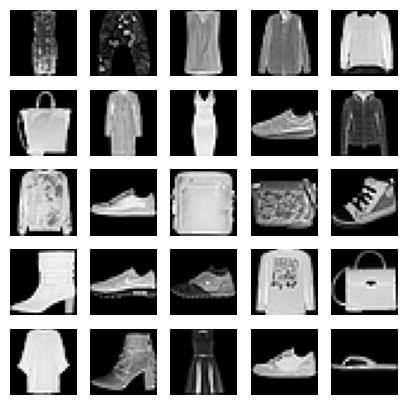

In [42]:
indexes = np.random.randint(0,x_train.shape[0], size=25)
images=x_train[indexes]
labels=y_train[indexes]
print(labels)
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(5,5))
for i in range(len(indexes)):
  plt.subplot(5,5,i+1)
  image=images[i]

  plt.imshow(image,cmap='gray')
  plt.axis('off')

In [43]:
for i in labels:
  print(class_names[i])

Dress
Trouser
Shirt
Shirt
Shirt
Bag
Dress
Dress
Sneaker
Coat
Pullover
Sneaker
Bag
Bag
Sneaker
Ankle Boot
Sneaker
Sneaker
Pullover
Bag
Shirt
Ankle Boot
Dress
Sneaker
Sandal


In [44]:
input_shape=(x_train.shape[1:]+(1,))
num_classes=len(np.unique(y_train))
num_classes

10

In [45]:

input_shape

(28, 28, 1)

In [46]:
y_train=to_categorical(y_train)
y_test=to_categorical(y_test)

In [47]:
input_=keras.layers.Input(shape=input_shape)
batchnorm=keras.layers.BatchNormalization()(input_)
layer1= keras.layers.Dense(units=128,activation='relu')(batchnorm)
dropout1 = keras.layers.Dropout(0.2)(layer1)
layer2= keras.layers.Dense(units=128,activation='relu')(dropout1)
dropout2 = keras.layers.Dropout(0.2)(layer2)
flatten=keras.layers.Flatten()(dropout2)
layer4= keras.layers.Dense(units=128,activation='relu')(flatten)
layer3= keras.layers.Dense(units=128,activation='relu')(layer4)
output = keras.layers.Dense(units=num_classes,activation='softmax')(layer3)
model = keras.Model( inputs =[input_],outputs =[output])

In [48]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 batch_normalization (Batch  (None, 28, 28, 1)         4         
 Normalization)                                                  
                                                                 
 dense_15 (Dense)            (None, 28, 28, 128)       256       
                                                                 
 dropout_2 (Dropout)         (None, 28, 28, 128)       0         
                                                                 
 dense_16 (Dense)            (None, 28, 28, 128)       16512     
                                                                 
 dropout_3 (Dropout)         (None, 28, 28, 128)       0         
                                                           

In [49]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [50]:
model.fit(x_train,y_train,epochs=5,batch_size=64)

Epoch 1/5
938/938 [==============================] - 605s 643ms/step - loss: 0.4852 - accuracy: 0.8246
Epoch 2/5
938/938 [==============================] - 588s 627ms/step - loss: 0.3490 - accuracy: 0.8710
Epoch 3/5
938/938 [==============================] - 584s 623ms/step - loss: 0.3150 - accuracy: 0.8833
Epoch 4/5
938/938 [==============================] - 583s 622ms/step - loss: 0.2859 - accuracy: 0.8931
Epoch 5/5
938/938 [==============================] - 594s 633ms/step - loss: 0.2636 - accuracy: 0.9003


In [51]:
loss,acc =model.evaluate(x_test,y_test,batch_size=batch_size)

79/79 [==============================] - 20s 243ms/step - loss: 0.3428 - accuracy: 0.8807


[[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]


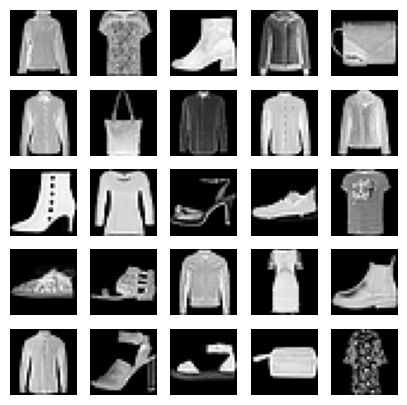

In [52]:
indexes = np.random.randint(0,x_test.shape[0], size=25)
images=x_test[indexes]
labels=y_test[indexes]
print(labels)
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(5,5))
for i in range(len(indexes)):
  plt.subplot(5,5,i+1)
  image=images[i]

  plt.imshow(image,cmap='gray')
  plt.axis('off')

In [53]:
model.predict(x_test[indexes])

1/1 [==============================] - 0s 212ms/step


array([[5.03387764e-06, 2.65343260e-07, 5.79735776e-03, 4.92350000e-06,
        9.85394299e-01, 4.61042440e-08, 8.79747700e-03, 2.98923254e-07,
        2.52936218e-07, 5.56583899e-08],
       [9.93654311e-01, 1.96134406e-05, 1.66098805e-04, 1.77431939e-05,
        1.00612374e-06, 1.05718212e-09, 6.14101952e-03, 4.10529138e-10,
        2.67410314e-07, 3.44714057e-09],
       [1.38958101e-09, 1.59368114e-14, 7.72415465e-11, 7.24341485e-13,
        1.59698799e-11, 2.17170236e-06, 3.97237965e-10, 1.15326802e-04,
        9.20252069e-11, 9.99882400e-01],
       [2.23028073e-05, 1.08759380e-07, 3.19591835e-02, 7.36345783e-06,
        9.01779950e-01, 1.52090980e-08, 6.62269592e-02, 3.85262723e-07,
        9.97262362e-08, 3.70446514e-06],
       [3.26653899e-05, 5.22341210e-08, 1.08513359e-05, 4.75263118e-09,
        2.94493457e-05, 6.61433489e-07, 1.89774782e-05, 9.12741953e-08,
        9.99907076e-01, 6.85199524e-08],
       [7.95057804e-06, 3.71120112e-09, 9.75704868e-04, 1.11400357e-06,
   